# Disk Scheduling Algorithms


<br><b> Following Disk Scheduling Algorithms are demonstrated:<br></b>
    * FCFS
    * SSTF
    * SCAN
    * CSCAN
    * LOOK
    * CLOOK
<br>
The process needs either CPU time or Input/Output Time. And for I/O it requires access to disk. The technique that operating system uses to determine the request which is to be satisfied next is called disk scheduling.<br>
<br>
<img src="image.png">
<font size = 1>
<br>Image Source:<br>
https://notesformsc.org/computer-science/operating-systems/operating-systems-disk-scheduling-algorithms/<br> </font>

<br>
 
Seek Time<br>
Seek time is the time taken in locating the disk arm to a specified track where the read/write request will be satisfied.
<br><br>
Rotational Latency<br>
It is the time taken by the desired sector to rotate itself to the position from where it can access the R/W heads.
<br><br>
Transfer Time<br>
It is the time taken to transfer the data.
<br><br>
Disk Access Time<br>
Disk access time is given as,
<br><br>
Disk Access Time = Rotational Latency + Seek Time + Transfer Time
<br><br>
Disk Response Time<br>
It is the average of time spent by each request waiting for the IO operation.

### First Come First Served (FCFS)

It is the most simple scheduling algorithm. It has no <b> starvation</b>. <br>
<br>
<b>Advantages:</b><br>
<br>
Every request gets a fair chance<br>
No indefinite postponement<br><br>
<b>Disadvantages:</b><br>
<br>
Does not try to optimize seek time<br>
May not provide the best possible service<br>

In [1]:
from matplotlib import pyplot as plt
import math

In [2]:
sequence = [98,183,37,122,14,129,65,67]
start = 53
CYLINDER_MAX = 199

In [3]:
def FCFS(sequence,start):
    temp = sequence.copy()
    temp.insert(0,start)
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    size = len(temp)
    x = temp
    y = []
    headmovement = 0
    for i in range(0,size):
        y.append(-i)
        if i!=size-1:
            headmovement = headmovement + abs(temp[i]-temp[i+1])
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(temp)
    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="FCFS")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("First Come First Served Scheduling Algorithm")
    plt.text(172.5, -8.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(172.5, -9.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()

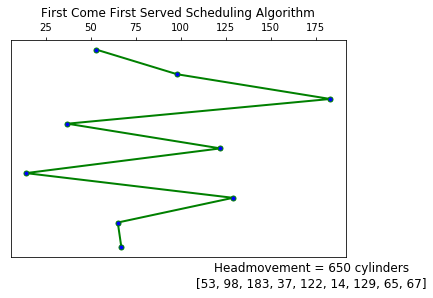

In [4]:
FCFS(sequence,start)

### Shortest Seek Time First (SSTF)

Here, the head moves to the nearest track required, irrespective of the direction. It selects the disk I/O request which requires the least disk arm movement from its current position
<br><br>
<b>Advantages:<br></b>
<br>
Average Response Time decreases<br>
Throughput increases<br><br>
<b>Disadvantages:</b><br>
<br>
Overhead to calculate seek time in advance<br>
Can cause Starvation for a request if it has higher seek time as compared to incoming requests<br>
High variance of response time as SSTF favours only some requests<br>

In [5]:
def SSTF(sequence,start):
    temp = sequence.copy()
    def next_in_sequence(seq,val):
        diff = 0
        mindiff = math.inf
        nextval = 0
        #print(seq)
        for i in range(0,len(seq)):
            if(seq[i]!=val):
                diff = abs(seq[i]-val)
                if(diff<mindiff):
                    mindiff=diff
                    nextval = seq[i]
        return nextval
    
    temp.insert(0,start)
    val = start
    x = []
    y = []
    size = 0
    x.append(start)
    headmovement = 0
    while(len(temp)):
        val = next_in_sequence(temp,val)
        #print(val)
        x.append(val)
        temp.remove(val)
    size = len(x)
    for i in range(0,size):
        y.append(-i)
        if i!=(size-1):
            headmovement = headmovement + abs(x[i]-x[i+1])
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(x)
    
    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="SSTF")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("Shortest Seek Time First Scheduling Algorithm")
    plt.text(182.5, -10.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -11.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show() 

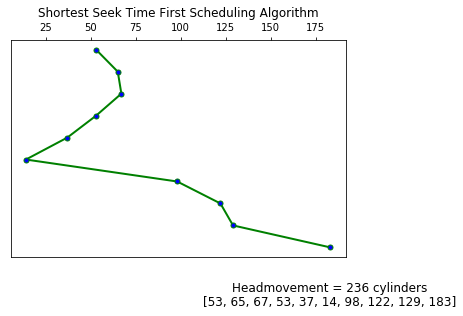

In [6]:
SSTF(sequence,start)

### SCAN (Elevator Algorithm)

It is also called as Elevator Algorithm. In this algorithm, the disk arm moves into a particular direction till the end, satisfying all the requests coming in its path,and then it turns backand moves in the reverse direction satisfying requests coming in its path.
<br><br>
<b>Advantages:</b><br>
<br>
High throughput<br>
Low variance of response time<br>
Average response time<br><br>
<b>Disadvantages:</b><br>
<br>
Long waiting time for requests for locations just visited by disk arm<br>

In [7]:
def SCAN(sequence,start,direction):
    temp = sequence.copy()
    left = []
    right = []
    x = []
    y = []
    x_approx = []
    y_approx = []
    headmovement = 0
    headmovement_approx = 0
    x.append(start)
    if(direction=="Left"):
        for i in temp:
            if i<start:
                left.append(i)
            else:
                right.append(i)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        x.append(0)
        right.sort()
        for i in right:
            x.append(i)
            
        x_approx.append(start)
        x_approx.append(min(x))
        x_approx.append(max(x))
        headmovement_approx = abs(start-0)
        headmovement_approx = headmovement_approx + abs(0-max(x))
    elif(direction=="Right"):
        for i in temp:
            if i>start:
                right.append(i)
            else:
                left.append(i)
        right.sort()
        for i in right:
            x.append(i)
        x.append(CYLINDER_MAX)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        x_approx.append(start)
        x_approx.append(max(x))
        x_approx.append(min(x))
        headmovement_approx = abs(start-199)
        headmovement_approx = headmovement_approx + abs(199-min(x))
    
    
    
    y_approx.append(0)
    size = len(x)
    for i in range(0,size):
        y.append(-i)
        if(x[i]==0 or x[i]==199):
            y_approx.append(-i)
        if i!=(size-1):
            headmovement = headmovement + abs(x[i]-x[i+1])
        else:
            y_approx.append(-i)
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(x)
    
    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="SCAN")
    plt.plot(x_approx,y_approx, dashes = [6,2] , color="red", markerfacecolor = 'red', marker='D', markersize = 5, linewidth = 0.5, label="Approx SCAN")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("SCAN Scheduling Algorithm")
    plt.text(182.5, -10.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -12.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()      

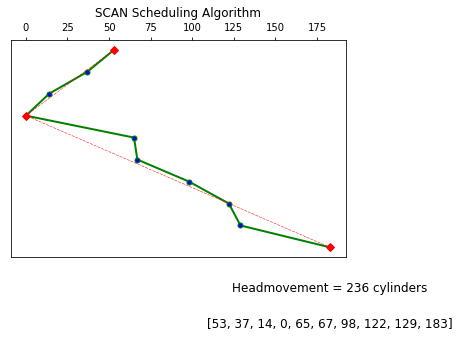

In [8]:
SCAN(sequence,start,"Left")

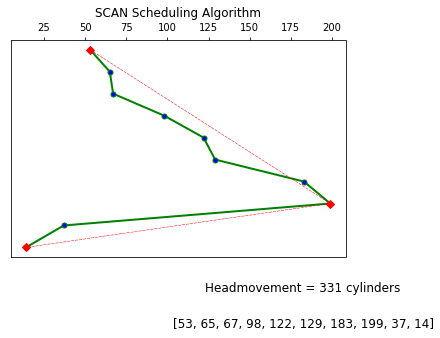

In [9]:
SCAN(sequence,start,"Right")

### CSCAN 

In C-SCAN algorithm, the arm of the disk moves in a particular direction servicing requests until it reaches the last cylinder, then it jumps to the last cylinder of the opposite direction without servicing any request then it turns back and start moving in that direction servicing the remaining requests.
<br><br>
<b>Advantages:</b><br>
<br>
Provides more uniform wait time compared to SCAN

In [10]:
def CSCAN(sequence, start, direction):
    temp = sequence.copy()
    left = []
    right = []
    x = []
    y = []
    x_approx = []
    y_approx = []
    headmovement = 0
    headmovement_approx = 0
    x.append(start)
    if(direction=="Left"):
        for i in temp:
            if i<start:
                left.append(i)
            else:
                right.append(i)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        x.append(0)
        x.append(CYLINDER_MAX)
        right.sort(reverse = True)
        for i in right:
            x.append(i)
        x_approx.append(start)
        x_approx.append(min(x))
        x_approx.append(max(x))
        x_approx.append(x[-1])
        headmovement_approx = abs(start-0)
        headmovement_approx = headmovement_approx + abs(0-max(x))
        headmovement_approx = headmovement_approx + abs(0-x[-1])
    elif(direction=="Right"):
        for i in temp:
            if i>start:
                right.append(i)
            else:
                left.append(i)
        right.sort()
        for i in right:
            x.append(i)
        x.append(CYLINDER_MAX)
        x.append(0)
        left.sort()
        for i in left:
            x.append(i)
        x_approx.append(start)
        x_approx.append(CYLINDER_MAX)
        x_approx.append(0)
        x_approx.append(x[-1])
        headmovement_approx = abs(start-199)
        headmovement_approx = headmovement_approx + abs(199-0)
        headmovement_approx = headmovement_approx + abs(0-x[-1])
    
    
    
    y_approx.append(0)
    size = len(x)
    for i in range(0,size):
        y.append(-i)
        if(x[i]==0 or x[i]==199):
            y_approx.append(-i)
        if i!=(size-1):
            headmovement = headmovement + abs(x[i]-x[i+1])
        else:
            y_approx.append(-i)
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(x)
    
    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="CSCAN")
    plt.plot(x_approx,y_approx, dashes = [6,2] , color="red", markerfacecolor = 'red', marker='D', markersize = 5, linewidth = 0.5, label="Approx CSCAN")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("CSCAN Scheduling Algorithm")
    plt.text(182.5, -10.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -12.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()      
    

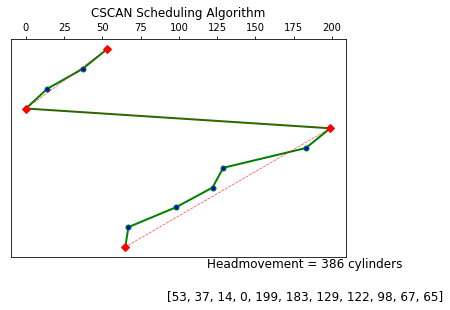

In [11]:
CSCAN(sequence,start,"Left")

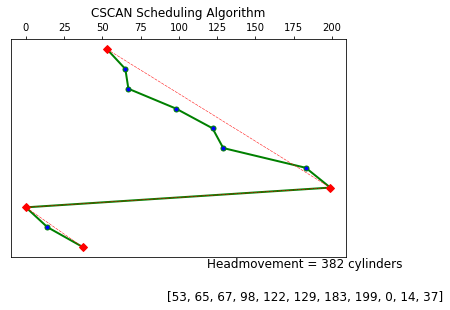

In [12]:
CSCAN(sequence,start,"Right")

### LOOK 

It is like SCAN scheduling Algorithm to some extant except the difference that, in this scheduling algorithm, the arm of the disk stops moving inwards (or outwards) when no more request in that direction exists. This algorithm tries to overcome the overhead of SCAN algorithm which forces disk arm to move in one direction till the end regardless of knowing if any request exists in the direction or not.

In [13]:
def LOOK(sequence, start, direction):
    temp = sequence.copy()
    left = []
    right = []
    x = []
    y = []
    x_approx = []
    y_approx = []
    headmovement = 0
    headmovement_approx = 0
    x.append(start)
    if(direction=="Left"):
        for i in temp:
            if i<start:
                left.append(i)
            else:
                right.append(i)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        right.sort()
        for i in right:
            x.append(i)
        x_approx.append(start)
        x_approx.append(min(x))
        x_approx.append(max(x))
        headmovement_approx = abs(start-min(x))
        headmovement_approx = headmovement_approx + abs(min(x)-max(x))
    elif(direction=="Right"):
        for i in temp:
            if i>start:
                right.append(i)
            else:
                left.append(i)
        right.sort()
        for i in right:
            x.append(i)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        x_approx.append(start)
        x_approx.append(max(x))
        x_approx.append(min(x))
        headmovement_approx = abs(start-max(x))
        headmovement_approx = headmovement_approx + abs(max(x)-min(x))
    
    
    
    y_approx.append(0)
    size = len(x)
    for i in range(0,size):
        y.append(-i)
        if((x[i]==max(x) or x[i]==min(x)) and (i!=size)):
            y_approx.append(-i)
        if i!=(size-1):
            headmovement = headmovement + abs(x[i]-x[i+1])
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(x)
    
    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="LOOK")
    plt.plot(x_approx,y_approx, dashes = [6,2] , color="red", markerfacecolor = 'red', marker='D', markersize = 5, linewidth = 0.5, label="Approx LOOK")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("LOOK Scheduling Algorithm")
    plt.text(182.5, -10.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -12.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()      

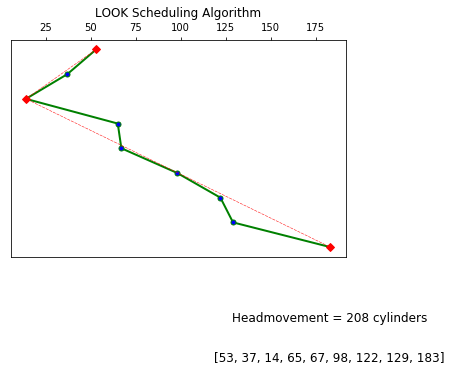

In [14]:
LOOK(sequence,start,"Left")

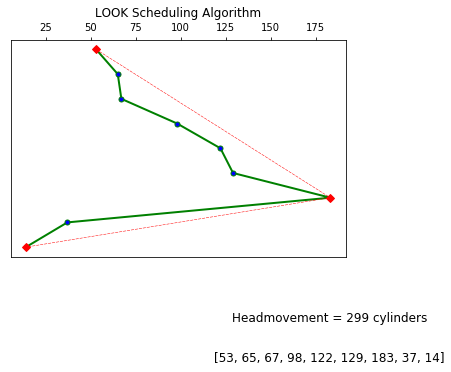

In [15]:
LOOK(sequence,start,"Right")

### C LOOK

C Look Algorithm is similar to C-SCAN algorithm to some extent. In this algorithm, the arm of the disk moves outwards servicing requests until it reaches the highest request cylinder, then it jumps to the lowest request cylinder without servicing any request then it again start moving outwards servicing the remaining requests.
<br><br>
It is different from C SCAN algorithm in the sense that, C SCAN force the disk arm to move till the last cylinder regardless of knowing whether any request is to be serviced on that cylinder or not.

In [16]:
def CLOOK(sequence, start, direction):
    temp = sequence.copy()
    left = []
    right = []
    x = []
    y = []
    x_approx = []
    y_approx = []
    headmovement = 0
    headmovement_approx = 0
    x.append(start)
    if(direction=="Left"):
        for i in temp:
            if i<start:
                left.append(i)
            else:
                right.append(i)
        left.sort(reverse = True)
        for i in left:
            x.append(i)
        right.sort(reverse = True)
        for i in right:
            x.append(i)
        x_approx.append(start)
        x_approx.append(min(x))
        x_approx.append(max(x))
        x_approx.append(x[-1])
        headmovement_approx = abs(start-min(x))
        headmovement_approx = headmovement_approx + abs(min(x)-max(x))
        headmovement_approx = headmovement_approx + abs(max(x)-x[-1])
    elif(direction=="Right"):
        for i in temp:
            if i>start:
                right.append(i)
            else:
                left.append(i)
        right.sort()
        for i in right:
            x.append(i)
        left.sort()
        for i in left:
            x.append(i)
        x_approx.append(start)
        x_approx.append(max(x))
        x_approx.append(min(x))
        x_approx.append(x[-1])
        headmovement_approx = abs(start-max(x))
        headmovement_approx = headmovement_approx + abs(max(x)-min(x))
        headmovement_approx = headmovement_approx + abs(min(x)-x[-1])
    
    
    
    y_approx.append(0)
    size = len(x)
    for i in range(0,size):
        y.append(-i)
        if((x[i]==min(x) or x[i]==max(x))and(i!=size)):
            y_approx.append(-i)
        if i!=(size-1):
            headmovement = headmovement + abs(x[i]-x[i+1])
        else:
            y_approx.append(-i)
    string = 'Headmovement = ' + str(headmovement) + ' cylinders'
    string2 = str(x)
    
    plt.plot(x,y, color="green", markerfacecolor = 'blue', marker='o', markersize = 5, linewidth = 2, label="CLOOK")
    plt.plot(x_approx,y_approx, dashes = [6,2] , color="red", markerfacecolor = 'red', marker='D', markersize = 5, linewidth = 0.5, label="Approx CLOOK")
    plt.ylim = (0,size)
    plt.xlim = (0,CYLINDER_MAX)
    plt.yticks([])
    plt.title("CLOOK Scheduling Algorithm")
    plt.text(182.5, -10.85, string, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.text(182.5, -12.5, string2, horizontalalignment='center',verticalalignment='center',fontsize=12)
    plt.show()      
    

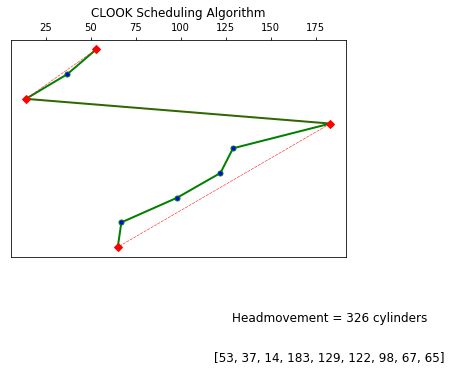

In [17]:
CLOOK(sequence,start,"Left")

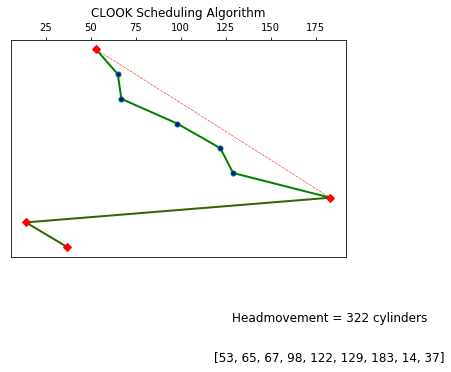

In [18]:
CLOOK(sequence,start,"Right")